<a href="https://colab.research.google.com/github/gulmert89/dsBootcamp/blob/master/odev102_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ödev 10.2 - Boyut Azaltma Yöntemleri: Temel Bileşenler Analizi

Bu ödevde, 70000 gri tonlamaladan ve 28x28 görüntüden oluşan başka bir görüntü veri kümesi olan moda MNIST veri kümesiyle çalışacağız. Veri kümesi aşağıdaki gibi 10 sınıfı içerir:

* Tişört/Üst
* Pantolon
* Kazak
* Elbise
* Ceket
* Sandalet
* Gömlek
* Spor ayakkabı
* Sırt çantası
* Bilek boyu bot

Veri setini sklearn.datasetsin fonksiyonu olan fetch_openmlile şu şekilde elde edebiliriz:

<code>mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)</code>

Alternatif olarak şu [link](https://github.com/zalandoresearch/fashion-mnist) kullanarak da veri yüklenebilir.

Rasgele 10000 görüntü seçin ve aşağıdaki alıştırmalarda bu örnek üzerinde çalışın. Bu ödevi tamamlamak için aşağıdaki ödevlerdeki çözümleri içeren Jupyter not defterine bir link gönderin:

1) Veri setini yükleyin ve verileri normalleştirmek gibi ön işlemlerinizi (preprocessing) yapın.

2) Verilere PCA uygulayın ve ilk iki ana bileşeni elde edin.

3) İlk iki ana bileşeni kullanarak, derste yaptığımız gibi veri noktalarını renklendirerek ve sınıflandırarak veri grafiğini çizin.

4) PCA çözümünün tatmin edici olduğunu düşünüyor musunuz? Farklı sınıfları kolayca ayırt edebiliyor musunuz?

# Çözüm:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

In [2]:
mnist = fetch_openml("Fashion-MNIST", version=1, cache=True)

In [3]:
np.random.seed(42)
indices = np.random.choice(70000, 10000)
X = mnist.data[indices] / 255    # pratik bir şekilde scale etmek için
y = mnist.target[indices]

In [4]:
print("Shape of X:", X.shape, "\nShape of y:", y.shape)

Shape of X: (10000, 784) 
Shape of y: (10000,)


In [5]:
df_label = pd.DataFrame({"Label":list(range(10)), 
                         "Description":["T-shirt/top", 
                                        "Trouser", "Pullover",
                                        "Dress", "Coat",
                                        "Sandal", "Shirt",
                                        "Sneaker", "Bag", "Ankle boot"]})
## yukarıda, index= yaparak da index atayabiliyorduk fakat yapamadım.
## onun yerine aşağıdaki set_index'i kullandım.
df_label = df_label.set_index("Label")    
print("Note that the labels of the output values are:\n")
df_label

Note that the labels of the output values are:



,Description
Label,
0,T-shirt/top
1,Trouser
2,Pullover
3,Dress
4,Coat
5,Sandal
6,Shirt
7,Sneaker
8,Bag


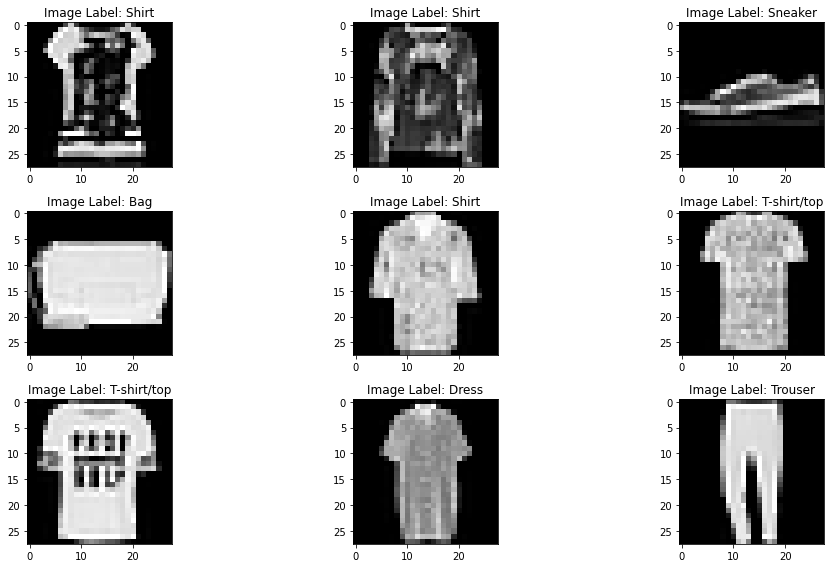

In [6]:
plt.figure(figsize=(15, 8))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X[i].reshape(28,28), cmap="gray")
    plt.title(f"Image Label: {df_label.iloc[int(y[i]), 0]}")
plt.tight_layout()
plt.show()

In [7]:
# principal components analysis
pca_model = PCA(n_components=2)
X_pca = pca_model.fit_transform(X)

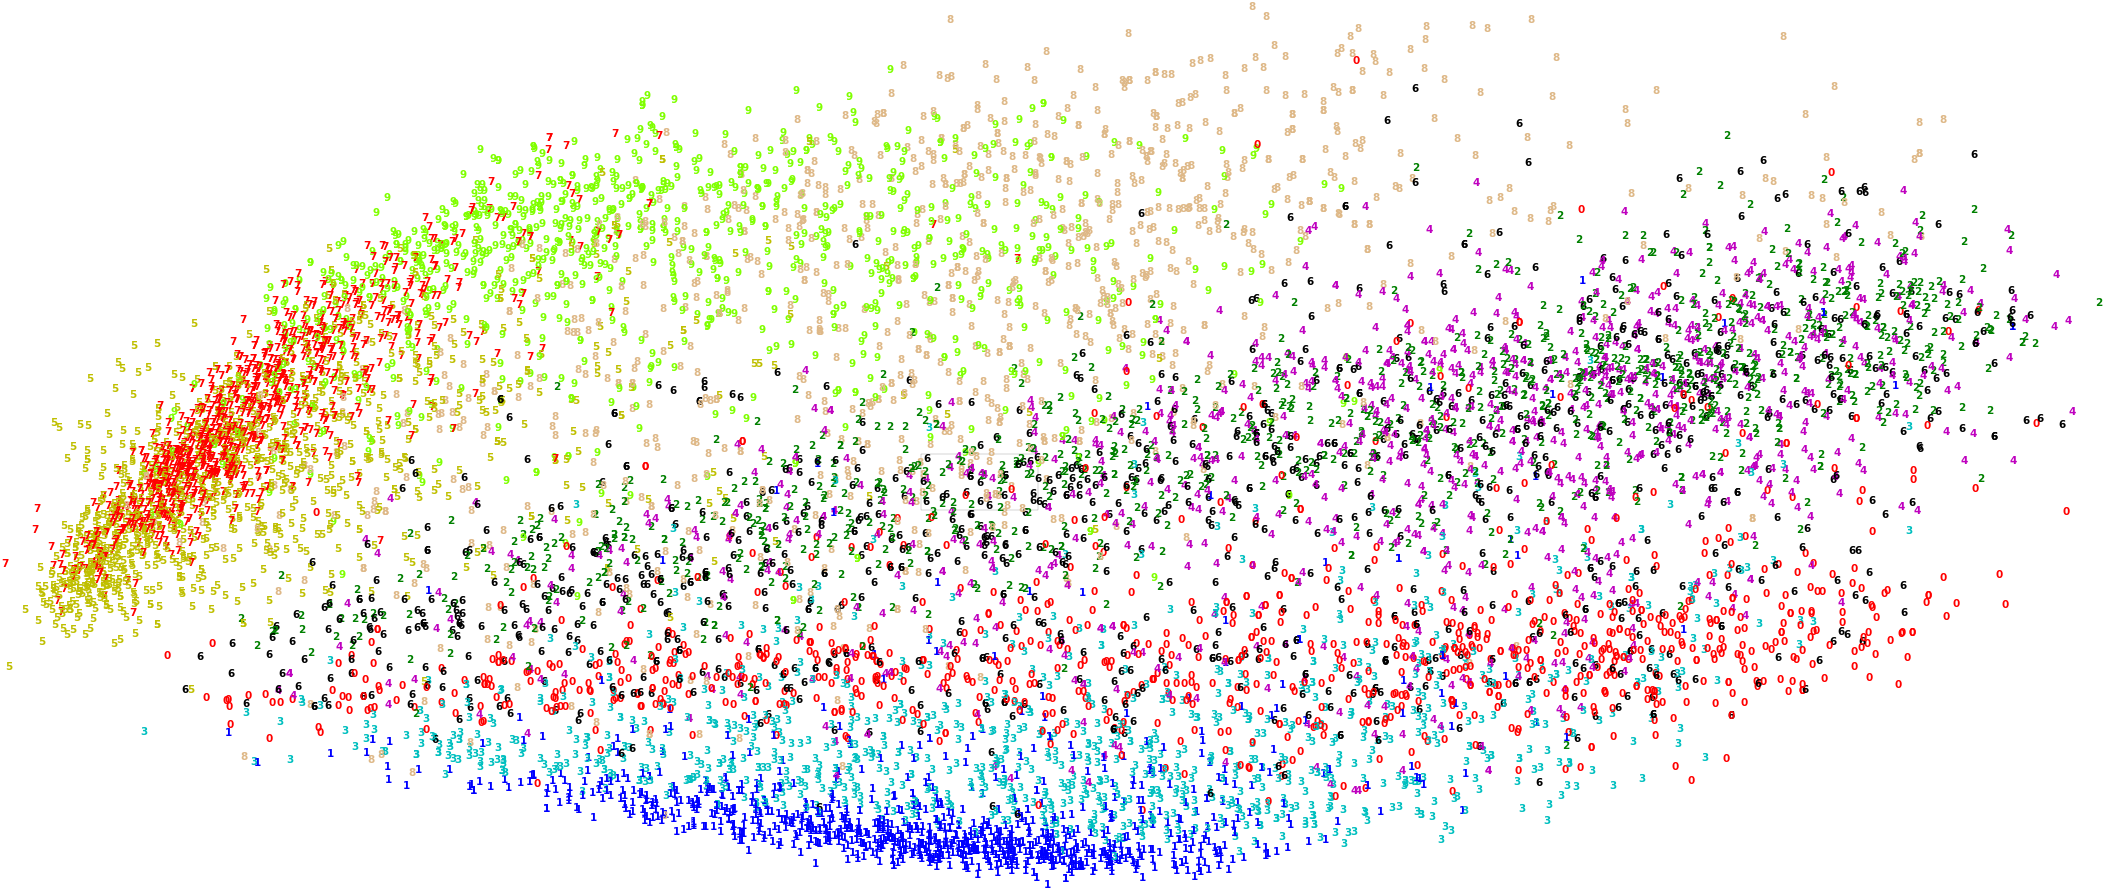

In [8]:
plt.figure(figsize=(10,5), dpi=15)
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(X_pca.shape[0]):
    plt.text(X_pca[i, 0], X_pca[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50})
plt.xticks([])
plt.yticks([])
plt.show()

**Yorum:**<br>
Kimi sınıfları ayırmak görsel olarak kolay olsa da (örneğin "pantolonlar"), "sandalet" ve "ayakkabı/sneaker" gibi bazı sınıfları görsel olarak birbirinden ayırmak pek mümkün gözükmüyor. Eğer gerçek sınıf değerlerini renkler ile ayıramasaydık, pantolonlar ile elbiseleri de ayırmak pek kolay olmayacaktı.